First, we import the necessary libraries.

# Welcome to the final project!
In this notebook you will be asked to use singular value decomposition and SVM to classify images. We will be working with the MNIST numbers dataset, where training data consist of pictures of digits, and the target value is the digit itself.

In [46]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Now, we read both training and test dataset as arrays. 

In [47]:
data = np.load('mnist.npz')
X_test_total, X_train_total, y_train_total, y_test_total = data['x_test'], data['x_train'], data['y_train'], data['y_test']

In [48]:
num1, num2 = 3, 8

Let us form the lists of indices i such that the target of i-th object of our training data is either num1 or num2. Do the same for the test dataset.

In [49]:
train_indx = [
    y == num1 or y == num2 
    for y in y_train_total
] 

# your code here
# fill the list with indeces 
test_indx = [
    y == num1 or y == num2 
    for y in y_test_total
] 

Form new arrays consisting of the data with the target values num1 and num2 only. 

In [50]:
X_train, y_train = X_train_total[train_indx], y_train_total[train_indx]

# fill the array with the target values
X_test, y_test = X_test_total[test_indx], y_test_total[test_indx] # your code here

The following two cells ensure automatic grading.

## Looking at the data

Let us check the sizes of the datasets and the shape of one image.

In [52]:
print('Data shapes: ')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

Data shapes: 
X_train:  (11982, 28, 28)
y_train:  (11982,)
X_test:  (1984, 28, 28)
y_test:  (1984,)


In [53]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

n_train, n_test

(11982, 1984)

In [54]:
print('Shape of one item: ')
print(X_train[0].shape)

Shape of one item: 
(28, 28)


Train data are images of digits.

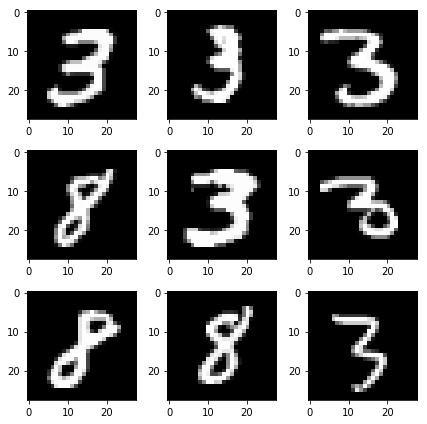

In [55]:
plt.figure(figsize=(6,6))

a, b = 3, 3

for i in range(a*b):  
    
    plt.subplot(b, a, i+1)
    plt.imshow(X_train[i], cmap='gray')
    
plt.tight_layout()
plt.show()

Target values are numbers.

In [56]:
y_train[:9]

array([3, 3, 3, 8, 3, 3, 8, 8, 3], dtype=uint8)

## Task 1 (1 point)
Now our data is 3-dimensional of shape (number of images, n_pixels, n_pixels). To work with PCA and SVM we need to flatten the images by turning each of them into an array of shape (n_pixels x n_pixels, ).

In [57]:
# library --- https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html

def flatten_image(X):
    # your code here
    # aproach using standard formulae 
    return X.flatten()

To flatt the image we can use given pixels. 

For example: 

if we have the picture of shape n_pixels x m_pixels, we will have n_pixels * m_pixels number of pixels and before return we have to reshape the picture.

Here: return X.reshape(X.shape[0] * X.shape[1])

In [58]:
X_train_flat = np.array([flatten_image(img) for img in X_train]) # your code here
X_test_flat = np.array([flatten_image(img) for img in X_test])

X_test_flat.shape, X_test_flat.shape

((1984, 784), (1984, 784))

PCA works best when the data is scaled (think, why?), so let's scale our data. We will use [StandartScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for it. Note, that scaling replaces a collection of vectors x by the collection of the vectors $x' = (x-M)/D$, where $M$ is the mean vector of
the sample, $D$ is the vector of standard deviations of all components of the vectors, and the division is component-wise. So, the scaled collection has the same size as the original one, and each column has 0 mean and unit standard deviation.


In [59]:
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

## Question 1

Please write your answer on the impact of scaling below. Why does scaling help PCA? If your idea need some computer experiments for confirmation (say, training and accuracy calculations  with non-scaled data), please provide the code here as well.

**Feature scaling in machine learning** is the important steps during the pre-processing of data. Scaling impacks on a machine learning model and can **shows a weak or a better one**.This is because, the original predictors may have different scales.

**If we use PCA on un-normalized variables, it will lead to dependence of a principal component on the variable with high variance**. This is bad.

All numbers for the machine learning algorithm is the same. 10 litres and 10 kilometrs are completely two different things for humans, but for a model as a feature, it treats both as same.

#### For example: 
a data set with variables’ measuring units as gramms, kilometers, litres etc. The scale of variances in these variables will be different.

The machine learning model consider 
- the value 1000 gram > 5 kilogram 
- the value 7000 meter greater than 10 km 

The algorithm will give wrong predictions.

### Let's calculate the accuracy for our not scalled data

In [16]:
data_ = np.load('mnist.npz')
X_test_total_, X_train_total_, y_train_total_, y_test_total_ = data_['x_test'], data_['x_train'], data_['y_train'], data_['y_test']

num1_, num2_ = 3, 8

train_indx_ = [y == num1_ or y == num2_ for y in y_train_total_] 
test_indx_ = [y == num1_ or y == num2_ for y in y_test_total_]

X_train_, y_train_ = X_train_total_[train_indx_], y_train_total_[train_indx_]
X_test_, y_test_ = X_test_total_[test_indx_], y_test_total_[test_indx_]

n_train_ = X_train_.shape[0]
n_test_ = X_test_.shape[0]

X_train_flat_ = np.array([flatten_image(img) for img in X_train_])
X_test_flat_ = np.array([flatten_image(img) for img in X_test_])

pca_ = PCA(n_components=128, random_state=42)
X_train_flat_ = pca_.fit_transform(X_train_flat_)

X_test_flat_ = pca_.transform(X_test_flat_)

clf_ = LinearSVC(random_state=42)
clf_.fit(X_train_flat_, y_train_) 

y_pred_ = clf_.predict(X_test_flat_) 
acc_ = accuracy_score(y_pred_, y_test_) 
print("Test accuracy: ", acc_)

Test accuracy:  0.944556451613


We can see that the scalled data gives us the accuracy **0.96622983871**, but not scalled has **0.944556451613**.

In this case, this may not be such a big difference, but depending on the amount of data and the importance of the predicted data, such errors can be fatal.

### One more example
To illustrate this better, we can look at the given in standard library example.

### Sourse - https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

The dataset used is the Wine Dataset available at UCI. This dataset has continuous features that are heterogeneous in scale due to differing properties that they measure (i.e. alcohol content and malic acid).


Prediction accuracy for the normal test dataset with PCA
81.48%


Prediction accuracy for the standardized test dataset with PCA
98.15%


PC 1 without scaling:
[  1.76342917e-03  -8.35544737e-04   1.54623496e-04  -5.31136096e-03
   2.01663336e-02   1.02440667e-03   1.53155502e-03  -1.11663562e-04
   6.31071580e-04   2.32645551e-03   1.53606718e-04   7.43176482e-04
   9.99775716e-01]

PC 1 with scaling:
[ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


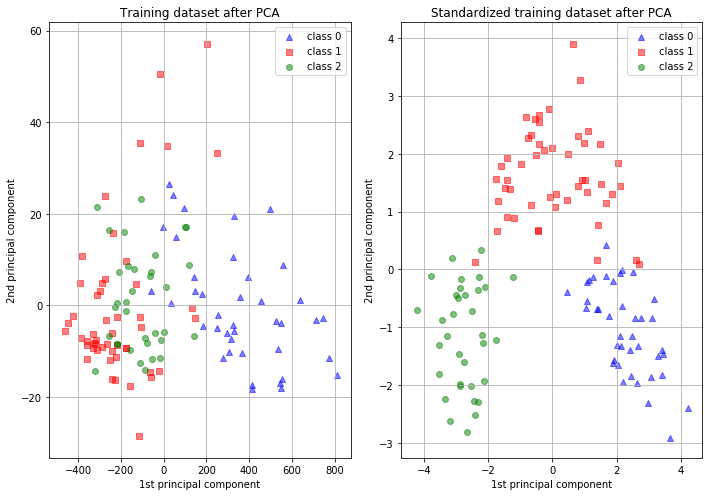

In [16]:
### Sourse - https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

RANDOM_STATE = 42
FIG_SIZE = (10, 7)


features, target = load_wine(return_X_y=True)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.30, random_state=RANDOM_STATE
)

# Fit to data and predict using pipelined GNB and PCA
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print("\nPrediction accuracy for the normal test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test):.2%}\n")

print("\nPrediction accuracy for the standardized test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test_std):.2%}\n")

# Extract PCA from pipeline
pca = unscaled_clf.named_steps["pca"]
pca_std = std_clf.named_steps["pca"]

# Show first principal components
print(f"\nPC 1 without scaling:\n{pca.components_[0]}")
print(f"\nPC 1 with scaling:\n{pca_std.components_[0]}")

# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train)

scaler = std_clf.named_steps["standardscaler"]
scaled_X_train = scaler.transform(X_train)
X_train_std_transformed = pca_std.transform(scaled_X_train)

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

plt.tight_layout()

plt.show()

We can see then the 1st principal component in the unscaled set. The feature #13 dominates the direction, being a whole two orders of magnitude above the other features. In the scaled version, the orders of magnitude are roughly the same across all the features.

The dataset used is the Wine Dataset available at UCI. This dataset has continuous features that are heterogeneous in scale due to differing properties that they measure (i.e. alcohol content and malic acid).

When the transformed data is used to train a naive Bayes classifier, we can see the difference in prediction accuracies,  the dataset which is scaled before PCA vastly outperforms the unscaled version.

- **Prediction accuracy for the normal test dataset with PCA - 81.48%**


- **Prediction accuracy for the standardized test dataset with PCA - 98.15%**

Now, we call PCA and reduce the number of components for each vector. 

In [60]:
pca = PCA(n_components=128, random_state=42)

X_train_flat = pca.fit_transform(X_train_flat)

In [61]:
X_test_flat = pca.transform(X_test_flat)

In [62]:
X_test_flat.shape, X_test_flat.shape

((1984, 128), (1984, 128))

## Question 2

What is the ratio of the memory used for the data `compressed' by PCA and the one used for the original data?

### Ratio of the memory used for the data compressed by PCA and the one used for the original data

- For the data compressed by PCA we have (1984, 784).
- After for the data compressed by PCA we have (1984, 128).

$$ratio = \frac{1984 * 784}{1984 * 128} = \frac{784}{128} = 6.125$$

To work with the original data without the PCA method, 6.125 times more memory is required.

Now, we use SVM with linear kernel to separate the two classes.

In [63]:
%%time
clf = LinearSVC(random_state=42)
clf.fit(X_train_flat, y_train) 

CPU times: user 2.72 s, sys: 0 ns, total: 2.72 s
Wall time: 2.71 s


Now, let us make the predictions and calculate the accuracy, that is, the ratio of the true predictions to the test sample size.  Use [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) as the quality metric here.

$$accuracy(y\_true, y\_pred) = \frac{1}{n}\sum_{i=1}^n [y\_true_i=y\_pred_i],$$ where $[a=b]=1$, if $a=b$, and $0$ otherwise.

In [64]:
# library ---  scikit --- https://scikit-learn.org/stable/getting_started.html

y_pred = clf.predict(X_test_flat)     # your code here
acc = accuracy_score(y_pred, y_test)  # your code here

print("Test accuracy: ", acc)

Test accuracy:  0.96622983871


## Try it from your own input
Try to make your own dataset. You can either make a photo image of an ink-written digit or draw a digit using a graphical editor of your computer or smartphone. Note that the input picture has to be a white number on a black background, like the numbers in the MNIST dataset. It can be either in png or jpeg format. Replace the sample striwith your file name. 

In [67]:
from scipy import misc
from PIL import Image

In [68]:
image = Image.open('three.png').convert('L')
new_image = image.resize((28, 28))

custom = np.array(new_image)
custom.shape

custom.shape

(28, 28)

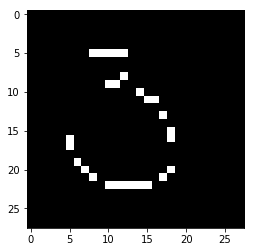

In [69]:
plt.imshow(custom, cmap='gray')
plt.show()

Re-shape your image and make a prediction. 

In [70]:
custom = flatten_image(custom).reshape(1, -1)
custom = scaler.transform(custom)
custom = pca.transform(custom)

custom.shape

(1, 128)

In [71]:
clf.predict(custom)

array([3], dtype=uint8)

## Question 3

Repeat the above digit recognition procedure with other 5 to 10 hand-written images. Do your experiments confirm the above accuracy estimate? How do you think, why they confirm (or not confirm) it?

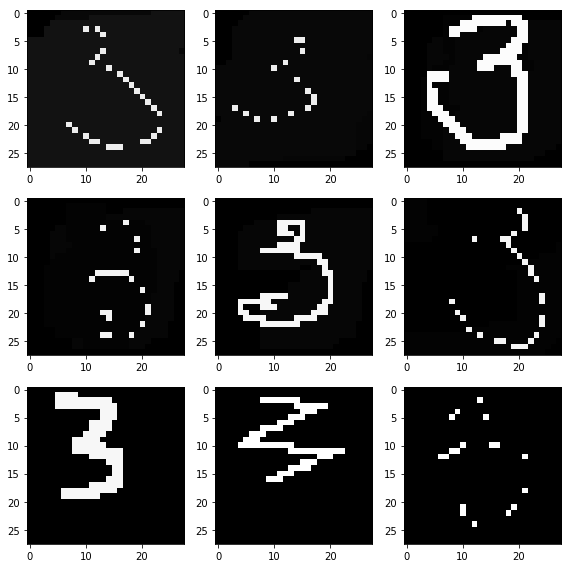

In [72]:
image1 = Image.open('3_1.png').convert('L')
new_image1 = image1.resize((28, 28))
image2 = Image.open('3_2.png').convert('L')
new_image2 = image2.resize((28, 28))
image3 = Image.open('3_3.png').convert('L')
new_image3 = image3.resize((28, 28))
image4 = Image.open('3_4.png').convert('L')
new_image4 = image4.resize((28, 28))
image5 = Image.open('3_5.png').convert('L')
new_image5 = image5.resize((28, 28))
image6 = Image.open('3_6.png').convert('L')
new_image6 = image6.resize((28, 28))
image7 = Image.open('3_7.png').convert('L')
new_image7 = image7.resize((28, 28))
image8 = Image.open('3_8.png').convert('L')
new_image8 = image8.resize((28, 28))
image9 = Image.open('3_9.png').convert('L')
new_image9 = image9.resize((28, 28))


images_list = [
    new_image1, new_image2, new_image3, 
    new_image4, new_image5, new_image6, 
    new_image7, new_image8, new_image9,
]

plt.figure(figsize=(8,8))

a, b = 3, 3

for i in range(a*b):  
    
    plt.subplot(b, a, i+1)
    plt.imshow(images_list[i], cmap='gray')
    
plt.tight_layout()
plt.show()
    
    

In [73]:
i = 0

for new_image in images_list:
    
    custom = np.array(new_image)
    # flatt
    custom = flatten_image(custom).reshape(1, -1)
    # scale
    custom = scaler.transform(custom)
    # pca
    custom = pca.transform(custom)
    # predict
    predict = clf.predict(custom)[0]
    
    i += 1
    # we have number = 3
    output = "Correct" if 3 == predict else "Wrong"
    print(3,'->', predict,'-', output)
  

3 -> 3 - Correct
3 -> 3 - Correct
3 -> 3 - Correct
3 -> 8 - Wrong
3 -> 8 - Wrong
3 -> 3 - Correct
3 -> 3 - Correct
3 -> 3 - Correct
3 -> 3 - Correct


As we can see from the experiment, out of 9 pictures with the number 3, 7 were recognized, two pictures were identified as the number 8.

**Accuracy = 7/9 * 100 = 77.78%**.

An error can be detected by inaccurate writing of numbers, the presence of more round contours close to a closure.

## Task 2
Now let's try another approach explained [here](https://intranet.math.vt.edu/ugresearch/Lassiter_2012_2013.pdf) in Section 3. For each digit, we create a new matrix $A$ whose columns are flattened images of this digit. The first several (say, 10) columns of the matrix $U$ from SVD decomposition of $A$ represent a collection of "typical" images of this digit. Given an unrecognized flatten image, among average typical flattened images we find the closets one. Its target value is considered as a prediction for the target of the unrecognized image.

## SVD refesher
As you may recall from the lectures, SVD of a matrix $A$ is a decomposition:
$A = U \Sigma V^T,$ where $U$ and $V$ are orthogonal matrices. In this method we will be utilizing some properties of SVD.
Please note that due to large shapes of matrices the operations might take a while.

In [74]:
# library ---  https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

def getSingularVectorsLeft(matrix, number=10): # let's take first 10 numbers
    
    U, s, V = np.linalg.svd(matrix)
    
    # return first _number_ columns of U from SVD of _matrix_
    return U[:, :number] 

In [76]:
def getSingularImage(X_train, y_train, number):
    
    # find images whose target is _number_
    idx = [y == number for y in y_train]
    select_images = X_train[idx]
    
    n = select_images[0].shape[0]**2
    A = np.zeros((n,1))  
    
    for image in select_images:
        # add the flatten image
        mtrx = np.array([flatten_image(image)])
        # transpose
        mtrx_tr = np.transpose(mtrx)
        
        A = np.append(A, mtrx_tr, axis=1)
        
    # left_basis = # get left singular vectors
    # using recursion
    left_basis = getSingularVectorsLeft(A)
    
    return left_basis

Try it first on "0".

In [77]:
left_basis = getSingularImage(X_train_total, y_train_total, 0)

assert left_basis.shape, (784, 10)

### Task 2.1 (1 point)
Plot first 9 singular images of the digit 0 taking columns of matrix U and reshaping them back into images 28x28. Use `numpy.reshape`.

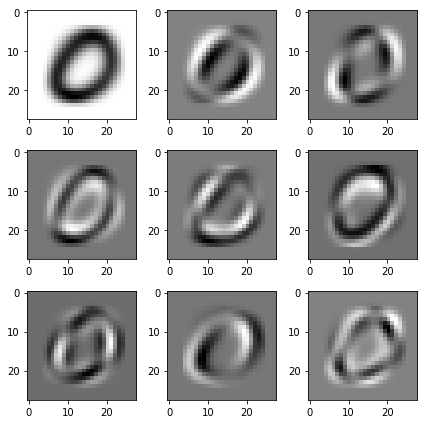

In [78]:
# singular images
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):  
    plt.subplot(b, a, i+1)
    
    # ith element of left basis reshaped back to 28x28
    img = np.reshape(left_basis[:, i], (28, 28)) 
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

## Question 4

Reflect on properties of the columns of $U_k$. What properties do you think are contained in each of them? Draw more singular images to help you make conclusions.

**The columns of U** (or singular vectors) are **nonzero singular values** form an orthogonal basis for the column space of A. Also **the first r columns of U span the column space of A**, where r is the rank of the matrix A.

This means **the first k columns of the matrix U is a collection of typical images of this digit**. Using this collection (Uk) regarding **Theorem of SVD Approximation** we can get **the best approximation fot the matrix A**, i.o. **make predictions**.

Now let's move on and obtain singular images for all numbers. The matrices $U_k$ from  [the article](https://intranet.math.vt.edu/ugresearch/Lassiter_2012_2013.pdf) are represented as `number_basis_matrices[k]`.
This might take a while to finish, feel free to add debug print in your function to know the progress.

In [81]:
number = 10

# use getSingularImage funciton to get matrices for all numbers
number_basis_matrices = [
    getSingularImage(X_train_total, y_train_total, i) 
    for i in range(number)
]  

### Task 2.2 (1 point)
Plot the first singular image of each digit, similarly to the previous task.

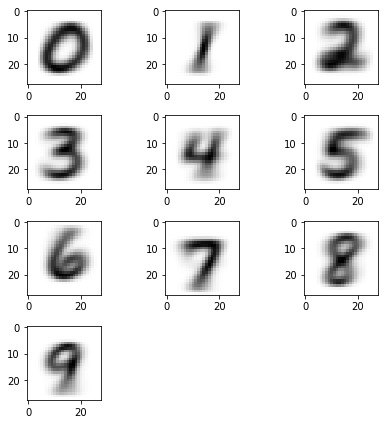

In [82]:
plt.figure(figsize=(6,6))
a, b = 3, 4
for i in range(10):  
    plt.subplot(b, a, i+1)
    
    # first column of U_k in number_basis_matrices[i] reshaped into 28x28 image
    img = np.reshape(number_basis_matrices[i][:, 0], (28, 28)) 
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

In [85]:
dim = number_basis_matrices[0].shape[0]

### Task 2.3 (1.5 points)

Here we calculate the new projection matrix for each $U_k$ to apply later in testing:
$pr = (I - U_k \cdot U_{k}^{T})$. Use `numpy.matmul` for matrix multiplication and `numpy.identity` to create an identity matrix. Please note that this operation might also take some time to finish.

In [87]:
number = 10

numeric_values = []

I = np.identity(number_basis_matrices[i].shape[0])

# create an array of pr for each number
for i in range(number):
    U_k = number_basis_matrices[i]
    U_k_tr = np.transpose(number_basis_matrices[i])
    
    numeric_values.append(I - np.matmul(U_k, U_k_tr))                         
                  

### Task 2.4 (1.5 points)
Implement function utilizing `numeric_values` matrices to predict labels for unknown images. Use `numpy.norm` and enumerate to iterate over numeric values.

In [91]:
def find_closest(test_value, numeric_values):
    
    stacked_test = test_value.reshape(-1, 1)
    
    # to avoid wrong data choose inf at the start
    minimun = np.Inf
    target = np.Inf
    
    # find closest U_k to test_value using norm and return the target digit
    for indx, matrx in enumerate(numeric_values):
        val = np.dot(matrx, stacked_test)
        val_norm = np.linalg.norm(val)
    
        if val_norm < minimun:
            minimun = val_norm
            target = indx
            
    return target

In [92]:
# find array of predictions for test values and calculate accuracy in the cell below
y_pred = np.array([find_closest(test_value, numeric_values) for test_value in X_test])


In [93]:
acc = accuracy_score(y_test, y_pred)

## Additional task (2 points)
In the first task we trained Linear SVM to separate 3s and 8s. Here you can implement multiclass classification for _all_ numbers in `MNIST`. Use the same function LinearSVC for “one-vs-the-rest” multi-class strategy, see [the documentation](https://scikit-learn.org/stable/modules/svm.html#classification).  Follow the same steps from task 1: scaling, feature selection, training and testing. Is the accuracy of this method greater then the one calculated above?

**Note:** Use `random_state=42` for `PCA` and `LinearSVC`. Training `LinearSVC` on all the data might take a while, that's normal.

In [96]:
# 1. flat the data
X_train_flat = np.array(
    [flatten_image(img) 
     for img in X_train_total])

X_test_flat = np.array(
    [flatten_image(img) 
     for img in X_test_total])

# 2. scall the data
scaler = StandardScaler()

X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

# 3. reduce the data, use PCA
# random_state=42
pca = PCA(n_components=128, random_state=42)

X_train_flat = pca.fit_transform(X_train_flat)
X_test_flat = pca.transform(X_test_flat)
X_train_flat.shape, X_test_flat.shape

# 4. use LinearSVC
clf = LinearSVC(random_state=42)
clf.fit(X_train_flat, y_train_total)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [97]:
# calculate accuracy
y_pred = clf.predict(X_test_flat)
acc = accuracy_score(y_test_total, y_pred)
acc

0.90959999999999996

SVM and SVD are represented using the vector-space model. VSM is sparse and high dimensional. The high
dimensional data does not provide better results for grouping. To reduce the high dimensionality better to use SVD approach.

As we can see from our experiments:

**The SVD method = 0.949.**

**SVM for multiclass classification = 0.91.**

SVD  has the best accuracy and using fewer components.

